In [40]:
r= 2**(1/12)

[A,A1,B,C,C1,D,D1,E,F,F1,G,G1,a]= \
[440*r**i for i in range(12+1)]

In [41]:
song= [A,A,E,E,F1,F1,E,E]

s= SKTrombone(song[0],song[1]).make_wave(.5)
for x in song[1:]:
    s= (s|SKTrombone(x,x).make_wave(.5))

In [42]:
s.make_audio()

In [43]:
import thinkdsp as td

x= td.UncorrelatedGaussianNoise()
x= x.make_wave(duration= 1, framerate= 10000)
x

In [44]:
x.ts, x.ys
x.ys.shape

(10000,)

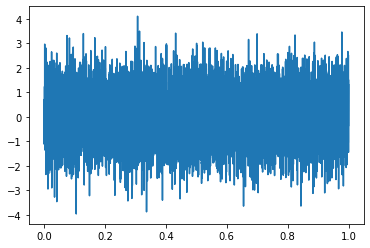

In [45]:
import matplotlib.pyplot as pl
pl.plot(x.ts, x.ys)

In [46]:
x.ys.max(), x.ys.mean(), x.ys.std()

(4.1002572768166345, -0.00622509059274653, 1.0050724805663436)

In [47]:
sx= x.make_spectrum()
sx.fs, sx.hs 
sx.hs.shape

(5001,)

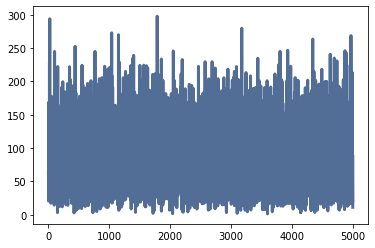

In [48]:
sx.plot()

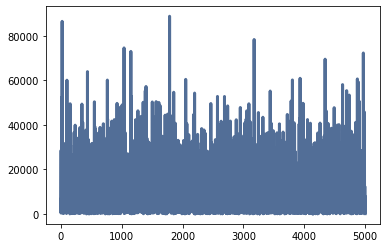

In [49]:
sx.plot_power()

In [50]:
Sx= sx.make_integrated_spectrum()
Sx.cs.shape

(5001,)

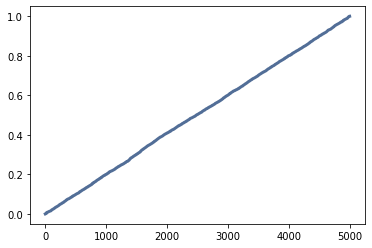

In [51]:
Sx.plot_power()

In [52]:
Sx.estimate_slope()

LinregressResult(slope=1.0013887806936244, intercept=-8.526085926307527, rvalue=0.9995873312489694, pvalue=0.0, stderr=0.0004070566295255381)

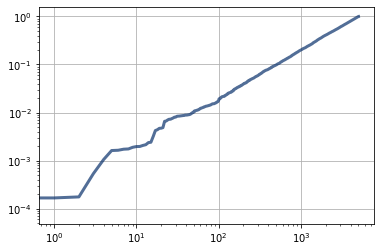

In [53]:
Sx.plot_power()
pl.xscale('log')
pl.yscale('log')
pl.grid(True)

In [54]:
Sx.estimate_slope()

LinregressResult(slope=1.0013887806936244, intercept=-8.526085926307527, rvalue=0.9995873312489694, pvalue=0.0, stderr=0.0004070566295255381)

In [55]:
y= x.cumsum()
x.ys.shape, y.ys.shape

((10000,), (10000,))

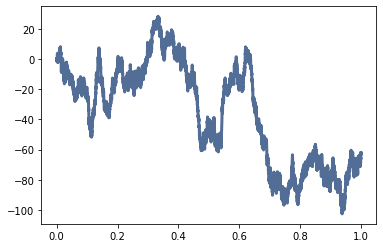

In [56]:
y.plot()

In [57]:
y.ys.max(), y.ys.mean(), y.ys.std()

(28.47594192794956, -35.50026694096117, 33.47533241115278)

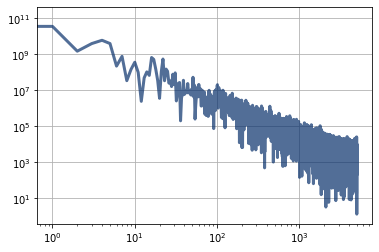

In [58]:
sy= y.make_spectrum()
sy.plot_power()
pl.xscale('log')
pl.yscale('log')
pl.grid(True)

In [59]:
sy.make_integrated_spectrum().estimate_slope()

LinregressResult(slope=0.0012140224234995466, intercept=-0.009457376551515918, rvalue=0.4030918434039703, pvalue=1.0179103620313614e-194, stderr=3.898714012327678e-05)

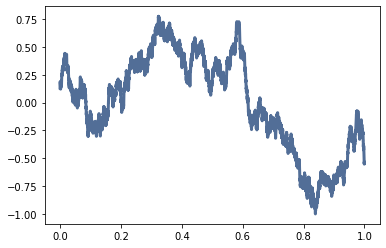

In [60]:
z= td.BrownianNoise().make_wave(duration=1, framerate=10000)
z.plot()

In [61]:
z.make_spectrum().make_integrated_spectrum().estimate_slope()

LinregressResult(slope=0.002803496976111295, intercept=-0.021860824274332114, rvalue=0.4363185393557549, pvalue=1.6419385842200274e-231, stderr=8.17787669577441e-05)

In [62]:
aUrl= 'https://query1.finance.yahoo.com/v7/finance/download/%5EGSPC?period1=-1325635200&period2=1588550400&interval=1d&events=history'
import pandas as pd
df= pd.read_csv(aUrl)

In [63]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1927-12-30,17.660000,17.660000,17.660000,17.660000,17.660000,0
1,1928-01-03,17.760000,17.760000,17.760000,17.760000,17.760000,0
2,1928-01-04,17.719999,17.719999,17.719999,17.719999,17.719999,0
3,1928-01-05,17.549999,17.549999,17.549999,17.549999,17.549999,0
4,1928-01-06,17.660000,17.660000,17.660000,17.660000,17.660000,0
...,...,...,...,...,...,...,...
23188,2020-04-27,2854.649902,2887.719971,2852.889893,2878.479980,2878.479980,5194260000
23189,2020-04-28,2909.959961,2921.149902,2860.709961,2863.389893,2863.389893,5672880000
23190,2020-04-29,2918.459961,2954.860107,2912.159912,2939.510010,2939.510010,6620140000
23191,2020-04-30,2930.909912,2930.909912,2892.469971,2912.429932,2912.429932,6523120000


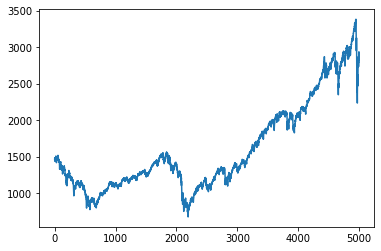

In [64]:
ys= df['Close'].values
ys= ys[-5000:]
pl.plot(ys)

In [65]:
yWave= td.Wave(ys, framerate= 10000)

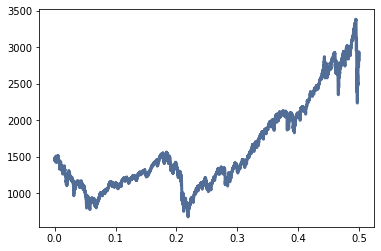

In [66]:
yWave.plot()

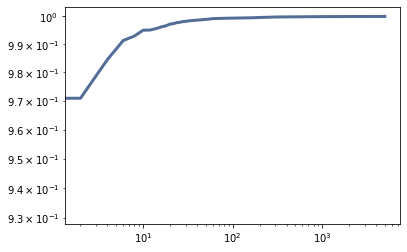

In [67]:
yWave.make_spectrum().make_integrated_spectrum().plot_power()
pl.xscale('log')
pl.yscale('log')

In [68]:
yWave.make_spectrum().make_integrated_spectrum().estimate_slope()

LinregressResult(slope=0.00032118267557806565, intercept=-0.0025138728815941023, rvalue=0.42786931354255375, pvalue=7.735021238915466e-112, stderr=1.3574898947827898e-05)

In [69]:
import thinkdsp as td
import numpy as np

class SKTrombone(td.Chirp):
    """Represents a trombone-like signal with varying frequency."""
    
    def evaluate(self, ts):
        """Evaluates the signal at the given times.
        ts: float array of times
        returns: float wave array
        """
        l1, l2=  1.0/self.start, 1.0/self.end
        lengths= np.linspace(l1, l2, len(ts)-1)
        freqs=   1/lengths
        return self._evaluate(ts, freqs)

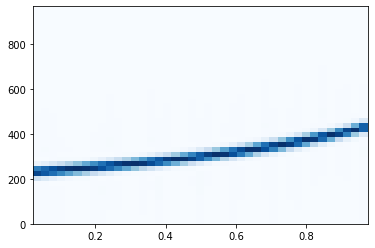

In [70]:
A3=  220 
E3=  330
A4=  440

s1= SKTrombone(start= A3, end= A4)
w1= s1.make_wave(duration=1)
w1.make_spectrogram(512).plot(high=1000)
w1.make_audio()


In [71]:
s2= SKTrombone(start= A4, end= E3)
w2= s2.make_wave(duration=1)
w2.make_audio()

In [72]:
w3= w1|w2
w3.make_audio()